In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division
import numpy as np

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<ipython-input-5-964987cc132d>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True).sort_index()


Text(0, 0.5, 'Frequency')

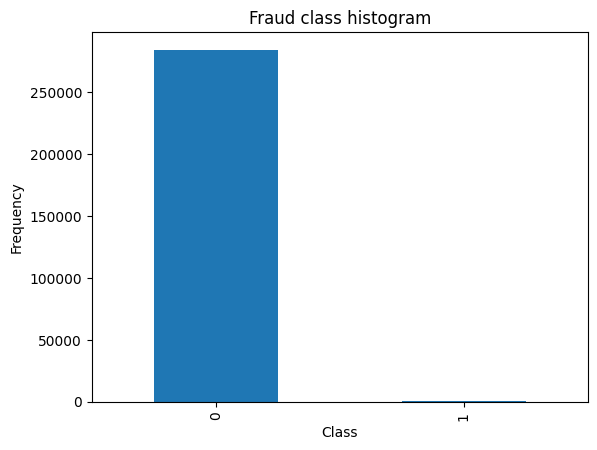

In [ ]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [ ]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [ ]:
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/float(len(under_sample_data)))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/float(len(under_sample_data)))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [ ]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [ ]:
c_param_range = [0.01,0.1,1,10,100]

print("# Tuning hyper-parameters for %s")
print()

clf = GridSearchCV(LogisticRegression(), {"C": c_param_range}, cv=5, scoring='recall')
clf.fit(X_train_undersample,y_train_undersample)

print ("Best parameters set found on development set:")
print ()
print (clf.best_params_)

print ("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

print ("Detailed classification report:")
print ("The model is trained on the full development set.")
print ("The scores are computed on the full evaluation set.")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for %s



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best parameters set found on development set:

{'C': 100}
Grid scores on development set:
0.875 (+/-0.072) for {'C': 0.01}
0.907 (+/-0.079) for {'C': 0.1}
0.916 (+/-0.067) for {'C': 1}
0.916 (+/-0.067) for {'C': 10}
0.919 (+/-0.060) for {'C': 100}
Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85296
           1       0.04      0.95      0.07       147

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.52     85443
weighted avg       1.00      0.96      0.98     85443




In [ ]:
# Find the best hyper-parameter optimizing for recall
def print_gridsearch_scores(x_train_data,y_train_data):
    c_param_range = [0.01,0.1,1,10,100]

    clf = GridSearchCV(LogisticRegression(), {"C": c_param_range}, cv=5, scoring='recall')
    clf.fit(x_train_data,y_train_data)

    print ("Best parameters set found on development set:")
    print ()
    print (clf.best_params_)

    print ("Grid scores on development set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print ("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

    return clf.best_params_["C"]

In [ ]:
best_c = print_gridsearch_scores(X_train_undersample,y_train_undersample)

C:\Users\ANILA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANILA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANILA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANILA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Best parameters set found on development set:

{'C': 1}
Grid scores on development set:
0.872 (+/-0.072) for {'C': 0.01}
0.899 (+/-0.078) for {'C': 0.1}
0.910 (+/-0.087) for {'C': 1}
0.910 (+/-0.087) for {'C': 10}
0.910 (+/-0.087) for {'C': 100}


C:\Users\ANILA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ANILA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANILA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l2')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

NameError: name 'best_c' is not defined

C:\Users\ANILA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Recall metric in the testing dataset:  0.9183673469387755


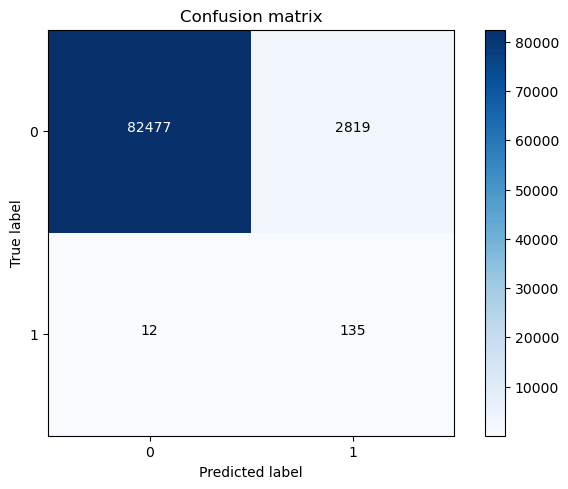

In [ ]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l2')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

C:\Users\ANILA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


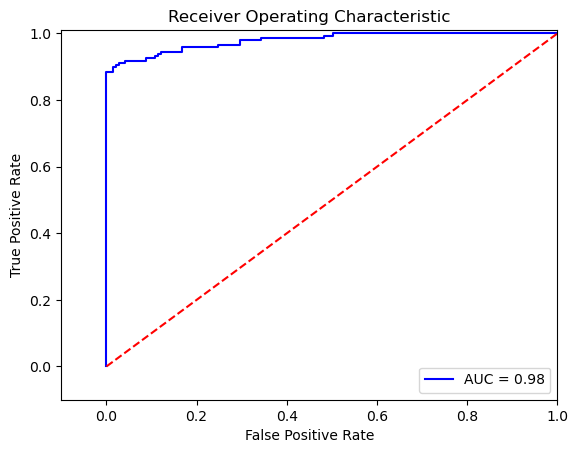

In [ ]:
# ROC CURVE
lr = LogisticRegression(C = best_c, penalty = 'l2')
y_pred_undersample_score = lr.fit(X_train_undersample,y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\ANILA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Recall metric in the testing dataset for threshold 0.1: 0.9931972789115646
Recall metric in the testing dataset for threshold 0.2: 0.9455782312925171
Recall metric in the testing dataset for threshold 0.3: 0.9251700680272109
Recall metric in the testing dataset for threshold 0.4: 0.8979591836734694
Recall metric in the testing dataset for threshold 0.5: 0.8639455782312925
Recall metric in the testing dataset for threshold 0.6: 0.8503401360544217
Recall metric in the testing dataset for threshold 0.7: 0.8435374149659864
Recall metric in the testing dataset for threshold 0.8: 0.8163265306122449
Recall metric in the testing dataset for threshold 0.9: 0.7755102040816326


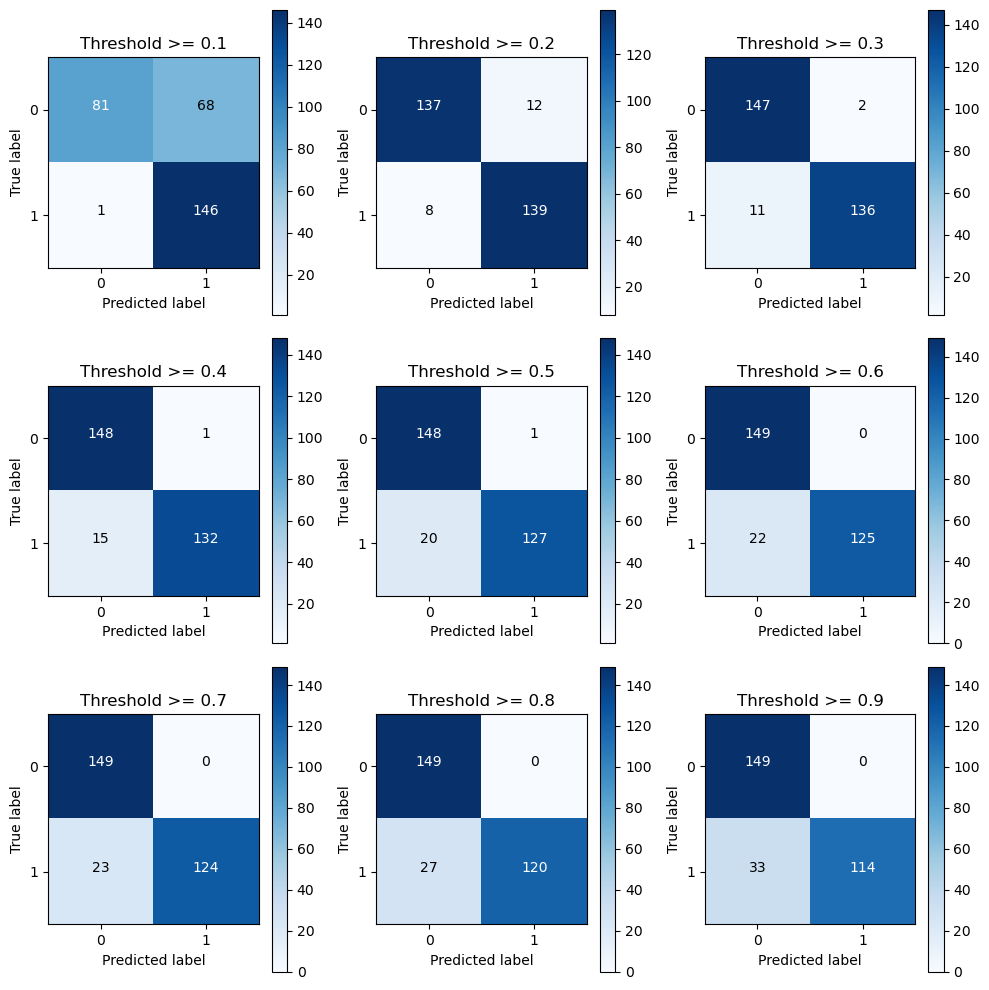

In [ ]:
lr = LogisticRegression(C = 0.01, penalty = 'l2')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i

    plt.subplot(3,3,j)
    j += 1

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print ("Recall metric in the testing dataset for threshold {}: {}".format(i, cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)

C:\Users\ANILA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


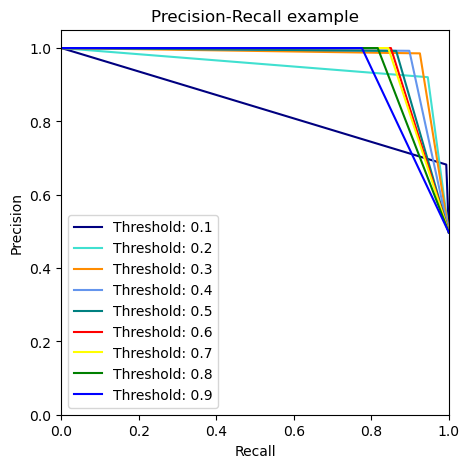

In [ ]:
from itertools import cycle

lr = LogisticRegression(C = 0.01, penalty = 'l2')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_undersample_proba[:,1] > i

    precision, recall, thresholds = precision_recall_curve(y_test_undersample,y_test_predictions_prob)

    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# change our function to have multiple hidden layers in our network
def network_builder(hidden_dimensions, input_dim):
    # create model
    model = Sequential()
    model.add(Dense(hidden_dimensions[0], input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    # add multiple hidden layers
    for dimension in hidden_dimensions[1:]:
        model.add(Dense(dimension, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Find the best hyper-parameter optimizing for recall
def print_gridsearch_scores_deep_learning(x_train_data,y_train_data):
    c_param_range = [0.01,0.1,1,10,100]

    clf = GridSearchCV(KerasClassifier(build_fn=network_builder, epochs=50, batch_size=128,
                                       verbose=1, input_dim=29),
                       {"hidden_dimensions": ([10], [10, 10, 10], [100, 10])}, cv=5, scoring='recall')
    clf.fit(x_train_data,y_train_data)

    print ("Best parameters set found on development set:")
    print ()
    print (clf.best_params_)

    print ("Grid scores on development set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print ("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
print_gridsearch_scores_deep_learning(X_train_undersample, y_train_undersample)

C:\Users\ANILA\AppData\Local\Temp\ipykernel_8696\1717805077.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = GridSearchCV(KerasClassifier(build_fn=network_builder, epochs=50, batch_size=128,


Epoch 1/50
5/5 [==============================] - 1s 10ms/step - loss: 0.7075 - accuracy: 0.4800
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 0.6888 - accuracy: 0.6455
Epoch 3/50
5/5 [==============================] - 0s 6ms/step - loss: 0.6725 - accuracy: 0.8491
Epoch 4/50
5/5 [==============================] - 0s 5ms/step - loss: 0.6565 - accuracy: 0.8745
Epoch 5/50
5/5 [==============================] - 0s 6ms/step - loss: 0.6389 - accuracy: 0.8909
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6208 - accuracy: 0.8964
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 0.6011 - accuracy: 0.9018
Epoch 8/50
5/5 [==============================] - 0s 5ms/step - loss: 0.5801 - accuracy: 0.9109
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 0.5592 - accuracy: 0.9145
Epoch 10/50
5/5 [==============================] - 0s 5ms/step - loss: 0.5393 - accuracy: 0.9164
Epoch 11/50
5/5 [====================

5/5 [==============================] - 0s 5ms/step - loss: 0.3144 - accuracy: 0.9418
Epoch 36/50
5/5 [==============================] - 0s 3ms/step - loss: 0.3090 - accuracy: 0.9418
Epoch 37/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3035 - accuracy: 0.9418
Epoch 38/50
5/5 [==============================] - 0s 5ms/step - loss: 0.2983 - accuracy: 0.9400
Epoch 39/50
5/5 [==============================] - 0s 5ms/step - loss: 0.2930 - accuracy: 0.9400
Epoch 40/50
5/5 [==============================] - 0s 6ms/step - loss: 0.2878 - accuracy: 0.9418
Epoch 41/50
5/5 [==============================] - 0s 5ms/step - loss: 0.2827 - accuracy: 0.9418
Epoch 42/50
5/5 [==============================] - 0s 4ms/step - loss: 0.2777 - accuracy: 0.9400
Epoch 43/50
5/5 [==============================] - 0s 5ms/step - loss: 0.2726 - accuracy: 0.9400
Epoch 44/50
5/5 [==============================] - 0s 5ms/step - loss: 0.2676 - accuracy: 0.9400
Epoch 45/50
5/5 [=========================

5/5 [==============================] - 0s 5ms/step - loss: 0.4118 - accuracy: 0.9220
Epoch 19/50
5/5 [==============================] - 0s 5ms/step - loss: 0.4017 - accuracy: 0.9220
Epoch 20/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3918 - accuracy: 0.9292
Epoch 21/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3826 - accuracy: 0.9347
Epoch 22/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3738 - accuracy: 0.9347
Epoch 23/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3655 - accuracy: 0.9328
Epoch 24/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3573 - accuracy: 0.9328
Epoch 25/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3495 - accuracy: 0.9347
Epoch 26/50
5/5 [==============================] - 0s 3ms/step - loss: 0.3420 - accuracy: 0.9347
Epoch 27/50
5/5 [==============================] - 0s 3ms/step - loss: 0.3347 - accuracy: 0.9347
Epoch 28/50
5/5 [=========================

5/5 [==============================] - 1s 4ms/step - loss: 0.6931 - accuracy: 0.4945
Epoch 2/50
5/5 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.6964
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.9109
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.7636
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.8382
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.9182
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6799 - accuracy: 0.9145
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6712 - accuracy: 0.9109
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6580 - accuracy: 0.9091
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6387 - accuracy: 0.9055
Epoch 11/50
5/5 [==============================] -

5/5 [==============================] - 0s 4ms/step - loss: 0.2264 - accuracy: 0.9491
Epoch 36/50
5/5 [==============================] - 0s 4ms/step - loss: 0.2156 - accuracy: 0.9491
Epoch 37/50
5/5 [==============================] - 0s 4ms/step - loss: 0.2055 - accuracy: 0.9491
Epoch 38/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1963 - accuracy: 0.9491
Epoch 39/50
5/5 [==============================] - 0s 5ms/step - loss: 0.1877 - accuracy: 0.9491
Epoch 40/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1793 - accuracy: 0.9491
Epoch 41/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1721 - accuracy: 0.9491
Epoch 42/50
5/5 [==============================] - 0s 7ms/step - loss: 0.1660 - accuracy: 0.9491
Epoch 43/50
5/5 [==============================] - 0s 5ms/step - loss: 0.1602 - accuracy: 0.9491
Epoch 44/50
5/5 [==============================] - 0s 5ms/step - loss: 0.1549 - accuracy: 0.9491
Epoch 45/50
5/5 [=========================

5/5 [==============================] - 0s 5ms/step - loss: 0.4508 - accuracy: 0.9310
Epoch 19/50
5/5 [==============================] - 0s 4ms/step - loss: 0.4296 - accuracy: 0.9310
Epoch 20/50
5/5 [==============================] - 0s 3ms/step - loss: 0.4110 - accuracy: 0.9292
Epoch 21/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3936 - accuracy: 0.9292
Epoch 22/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3775 - accuracy: 0.9292
Epoch 23/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3622 - accuracy: 0.9328
Epoch 24/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3474 - accuracy: 0.9328
Epoch 25/50
5/5 [==============================] - 0s 3ms/step - loss: 0.3327 - accuracy: 0.9310
Epoch 26/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3177 - accuracy: 0.9328
Epoch 27/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3029 - accuracy: 0.9328
Epoch 28/50
5/5 [=========================

5/5 [==============================] - 1s 4ms/step - loss: 0.6894 - accuracy: 0.6982
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6743 - accuracy: 0.8436
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6530 - accuracy: 0.9091
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6228 - accuracy: 0.9364
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 0.5853 - accuracy: 0.9345
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 0.5397 - accuracy: 0.9382
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 0.4956 - accuracy: 0.9400
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 0.4563 - accuracy: 0.9400
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 0.4224 - accuracy: 0.9400
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3941 - accuracy: 0.9455
Epoch 11/50
5/5 [==============================] -

5/5 [==============================] - 0s 5ms/step - loss: 0.0847 - accuracy: 0.9618
Epoch 36/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0824 - accuracy: 0.9655
Epoch 37/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0802 - accuracy: 0.9673
Epoch 38/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0781 - accuracy: 0.9691
Epoch 39/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0760 - accuracy: 0.9691
Epoch 40/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0746 - accuracy: 0.9709
Epoch 41/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0728 - accuracy: 0.9709
Epoch 42/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0708 - accuracy: 0.9709
Epoch 43/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0689 - accuracy: 0.9745
Epoch 44/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0672 - accuracy: 0.9745
Epoch 45/50
5/5 [=========================

5/5 [==============================] - 0s 4ms/step - loss: 0.2129 - accuracy: 0.9328
Epoch 19/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1944 - accuracy: 0.9365
Epoch 20/50
5/5 [==============================] - 0s 3ms/step - loss: 0.1776 - accuracy: 0.9365
Epoch 21/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1639 - accuracy: 0.9383
Epoch 22/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1522 - accuracy: 0.9401
Epoch 23/50
5/5 [==============================] - 0s 5ms/step - loss: 0.1423 - accuracy: 0.9437
Epoch 24/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1339 - accuracy: 0.9437
Epoch 25/50
5/5 [==============================] - 0s 6ms/step - loss: 0.1273 - accuracy: 0.9474
Epoch 26/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1211 - accuracy: 0.9510
Epoch 27/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1159 - accuracy: 0.9510
Epoch 28/50
5/5 [=========================

6/6 [==============================] - 1s 4ms/step - loss: 0.6824 - accuracy: 0.7645
Epoch 2/50
6/6 [==============================] - 0s 3ms/step - loss: 0.6612 - accuracy: 0.8910
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 0.6335 - accuracy: 0.9201
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 0.5958 - accuracy: 0.9273
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 0.5524 - accuracy: 0.9288
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 0.5057 - accuracy: 0.9317
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 0.4598 - accuracy: 0.9331
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 0.4184 - accuracy: 0.9317
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3806 - accuracy: 0.9346
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3450 - accuracy: 0.9360
Epoch 11/50
6/6 [==============================] -

C:\Users\ANILA\AppData\Local\Temp\ipykernel_8696\1334679313.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  k = KerasClassifier(build_fn=network_builder, epochs=50, batch_size=128,


10/10 [==============================] - 0s 4ms/step
Recall metric in the testing dataset:  0.9115646258503401


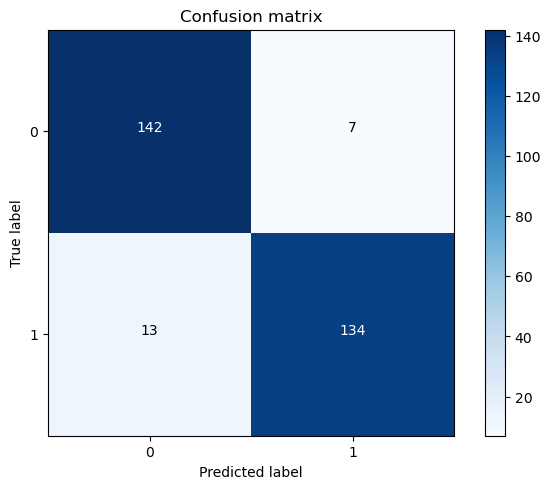

In [ ]:
# Use this hidden_dimensions paraemeter to build the final model with the whole training dataset and
# predict the classes in the test dataset
k = KerasClassifier(build_fn=network_builder, epochs=50, batch_size=128,
                     hidden_dimensions=[100, 10], verbose=0, input_dim=29)
k.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = k.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

2671/2671 [==============================] - 6s 2ms/step
Recall metric in the testing dataset:  0.9319727891156463


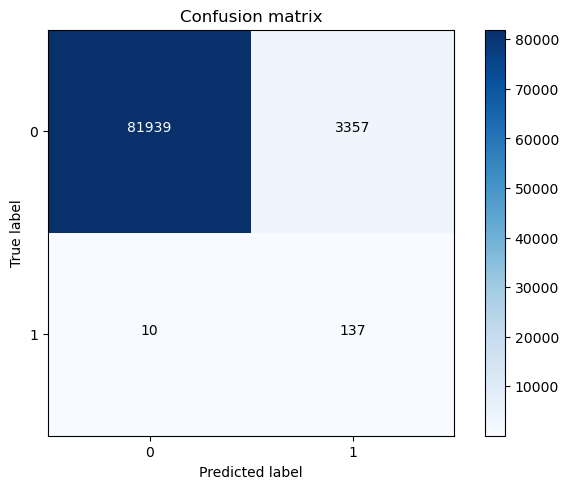

In [ ]:
y_pred = k.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()